## Introduction

This notebook gives an introduction to `pandana`, the network-based accessibility calculator used in UrbanSim, in the context of the Bay Area UrbanSim model.   Pandana is a general-purpose network aggregation library and can be used for non-UrbanSim use cases as well.  For additional information, see the documentation here:  https://github.com/UDST/pandana

In [1]:
%%capture
%matplotlib notebook
%matplotlib inline
import pandana as pdna
from urbansim.utils import misc

from ipywidgets import interact
from ipywidgets import FloatSlider

from bokeh.io import output_notebook, show
from bokeh.plotting import Figure
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend

output_notebook()

import datashader.transfer_functions as tf

import datashader as ds
from datashader.colors import viridis

import orca

In [2]:
from bayarea import datasources
from bayarea import variables
from bayarea import models

In [3]:
def visualize_parcel_variable(var_name):
    parcels = orca.get_table('parcels').to_frame(['x', 'y', var_name])

    cvs = ds.Canvas(plot_width=700, plot_height=500)
    agg = cvs.points(parcels, 'x', 'y', ds.mean(var_name))
    img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
    return img

def hh_network_access_plot(table_var_name, distance, agg_function, decay):
    network.set(households.node_id, variable = households[table_var_name].astype('float'))
    results = network.aggregate(distance, type=agg_function, decay=decay)

    access_var_name = '_'.join([agg_function, table_var_name, str(distance), decay])
    parcels[access_var_name] = misc.reindex(results, parcels.node_id)

    cvs = ds.Canvas(plot_width=700, plot_height=500)
    agg = cvs.points(parcels, 'x', 'y', ds.mean(access_var_name))
    img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
    return img

In [5]:
orca.run(['initialize_network_walk'])
orca.run(['initialize_network_beam'])

Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s
Running step 'initialize_network_beam'
Time to execute step 'initialize_network_beam': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s


In [6]:
parcels = orca.get_table('parcels').to_frame()
parcels.head()

Number of nodes is 415716.
Number of edges is 1162974.


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:82: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  nodes_df.astype('double').as_matrix(),
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  edges.as_matrix(),
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  .astype('double')
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:91: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.kdtree = KDTree(nodes_df.as_matrix())
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .val

Number of nodes is 72422.
Number of edges is 196344.


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:82: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  nodes_df.astype('double').as_matrix(),
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  edges.as_matrix(),
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  .astype('double')
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:91: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.kdtree = KDTree(nodes_df.as_matrix())
/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .val

,development_type_id,land_value,acres,county_id,zone_id,proportion_undevelopable,tax_exempt_status,apn,parcel_id_local,geom_id,imputation_flag,x,y,shape_area,block_id,node_id,node_id_walk,node_id_beam
parcel_id,,,,,,,,,,,,,,,,,,
229116,1,0.0,3.360520,1,725,0.0,0,099 029001700,,10305106092872,_,-121.795620,37.655379,1.359956e+04,060014511022061,53091636,53091636,32326
244166,1,0.0,1.294423,1,715,0.0,0,099B540210200,,11107351665227,_,-121.713004,37.717277,5.238348e+03,060014511011025,53059159,53059159,28383
202378,25,6036500.0,14.993605,1,820,0.0,1,085A643106000,,11030175960628,merged,-122.014199,37.655260,6.067702e+04,060014351031029,1852532916,1852532916,28377
2004420,-1,179954.0,316.247146,97,1401,0.0,0,141-100-012,,6381677629073,"_, nr_zone_yrblt, bsqft_from_nrsqft, stories1",-122.771868,38.727893,1.279808e+06,060971541003180,4533108955,304716887,36005
340332,2,0.0,0.621275,1,763,0.0,0,525 166004800,,314875459798,_,-121.974508,37.546277,2.514215e+03,060014419272014,443532766,2397935818,64514


In [7]:
orca.run(['network_aggregations_walk'])

Running step 'network_aggregations_walk'
Computing accessibility variables
Computing units_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing sqft_unit_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing singles_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 52084 rows because they contain missing values
Computing elderly_hh_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 34553 rows because they contain missing values
Computing children_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing units_sf_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing units_mf_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing pop_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing hh_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing poor_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 53114 rows because they contain missing values
Computing rich_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 38964 rows because they contain missing values
Computing renters_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 102597 rows because they contain missing values
Computing avg_income_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing jobs_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing avg_rent_500_walk


/home/paul/src/bayarea/bayarea/datasources.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rentals.rent[rentals.rent < 100] = 100
/home/paul/src/bayarea/bayarea/datasources.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rentals.rent[rentals.rent > 10000] = 10000
/home/paul/src/bayarea/bayarea/datasources.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  rentals.rent_sqft[rentals.rent_sqft < .2] = .2
/home/paul/src/bayarea/bayarea/datasources.py:71: SettingWithCopyWarning:

Computing pop_white_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 107372 rows because they contain missing values
Computing pop_black_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 10541 rows because they contain missing values
Computing pop_asian_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 51048 rows because they contain missing values
Computing pop_hisp_500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 31685 rows because they contain missing values
Computing units_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing sqft_unit_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing singles_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 52084 rows because they contain missing values
Computing elderly_hh_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 34553 rows because they contain missing values
Computing children_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing units_sf_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing units_mf_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing pop_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing hh_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing poor_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 53114 rows because they contain missing values
Computing rich_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 38964 rows because they contain missing values
Computing renters_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 102597 rows because they contain missing values
Computing avg_income_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing jobs_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing avg_rent_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing pop_white_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 107372 rows because they contain missing values
Computing pop_black_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 10541 rows because they contain missing values
Computing pop_asian_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 51048 rows because they contain missing values
Computing pop_hisp_1500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 31685 rows because they contain missing values
Computing pop_2500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 189769 rows because they contain missing values
Computing pop_white_2500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 107372 rows because they contain missing values
Computing pop_black_2500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 10541 rows because they contain missing values
Computing pop_asian_2500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 51048 rows because they contain missing values
Computing pop_hisp_2500_walk


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Removed 31685 rows because they contain missing values
Computing jobs_500_walk_retail


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_1500_walk_retail


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_2500_walk_retail


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_500_walk_fire


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_1500_walk_fire


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_2500_walk_fire


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_500_walk_tech


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_1500_walk_tech


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_2500_walk_tech


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_500_walk_serv


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_1500_walk_serv


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


Computing jobs_2500_walk_serv


/home/paul/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


compute additional aggregation variables
       units_500_walk  sqft_unit_500_walk  singles_500_walk  \
count   415716.000000        4.157160e+05     415716.000000   
mean       356.025760        1.295960e+03         94.368742   
std       1097.266478        9.937726e+03        344.532606   
min          0.000000        0.000000e+00          0.000000   
25%          8.000000        4.359567e+02          1.000000   
50%        188.000000        1.313067e+03         27.000000   
75%        440.000000        1.760865e+03         87.000000   
max     184977.000000        2.429847e+06      45805.000000   

       elderly_hh_500_walk  children_500_walk  units_sf_500_walk  \
count        415716.000000      415716.000000      415716.000000   
mean             58.488439         158.008881         163.913537   
std             241.396787         443.206144         704.706968   
min               0.000000           0.000000           0.000000   
25%               1.000000           3.000000      

In [8]:
nodeswalk = orca.get_table('nodeswalk').to_frame()
nodeswalk.head()

,units_500_walk,sqft_unit_500_walk,singles_500_walk,elderly_hh_500_walk,children_500_walk,units_sf_500_walk,units_mf_500_walk,pop_500_walk,hh_500_walk,poor_500_walk,...,prop_elderly_1500_walk,prop_black_1500_walk,prop_white_1500_walk,prop_asian_1500_walk,prop_hisp_1500_walk,prop_rich_1500_walk,prop_poor_1500_walk,pop_jobs_ratio_1500_walk,avg_hhs_500_walk,avg_hhs_1500_walk
node_id_walk,,,,,,,,,,,,,,,,,,,,,
25457938,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.103236,0.007344,0.694627,0.011210,0.877464,0.006958,0.124855,2.74628,0.000000,3.986133
25457939,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125000,0.000000,1.000000,0.000000,0.384615,0.076923,0.038462,0.0503876,0.000000,3.250000
26027651,336.0,1000.869046,86.0,153.0,178.0,66.0,270.0,783.0,334.0,68.0,...,0.282793,0.010092,0.614254,0.294418,0.098181,0.186020,0.063045,5.80753,2.344311,2.524693
26027655,340.0,2389.935261,126.0,27.0,114.0,46.0,294.0,616.0,310.0,52.0,...,0.185240,0.013942,0.579167,0.347482,0.088447,0.174940,0.073262,21.1276,1.987097,2.367746
26027656,154.0,875.882331,44.0,50.0,94.0,102.0,52.0,362.0,143.0,25.0,...,0.202490,0.013259,0.587344,0.352303,0.064399,0.178734,0.074817,4.27022,2.531469,2.370892


In [16]:
import pandas as pd
parcelmerge = parcels.join(nodeswalk, on='node_id_walk')

In [17]:
parcelmerge.head()

,development_type_id,land_value,acres,county_id,zone_id,proportion_undevelopable,tax_exempt_status,apn,parcel_id_local,geom_id,...,prop_elderly_1500_walk,prop_black_1500_walk,prop_white_1500_walk,prop_asian_1500_walk,prop_hisp_1500_walk,prop_rich_1500_walk,prop_poor_1500_walk,pop_jobs_ratio_1500_walk,avg_hhs_500_walk,avg_hhs_1500_walk
parcel_id,,,,,,,,,,,,,,,,,,,,,
229116,1,0.0,3.360520,1,725,0.0,0,099 029001700,,10305106092872,...,0.250390,0.010767,0.856258,0.124630,0.083445,0.161777,0.022880,337.727,3.100719,2.897816
244166,1,0.0,1.294423,1,715,0.0,0,099B540210200,,11107351665227,...,0.086594,0.024588,0.748189,0.171679,0.111306,0.138968,0.028760,650.714,2.892157,2.921745
202378,25,6036500.0,14.993605,1,820,0.0,1,085A643106000,,11030175960628,...,0.200000,0.146631,0.521797,0.258917,0.198151,0.173052,0.033025,252.333,2.818182,2.911538
2004420,-1,179954.0,316.247146,97,1401,0.0,0,141-100-012,,6381677629073,...,0.278673,0.006358,0.824115,0.025772,0.227732,0.064367,0.122439,2.85422,2.420144,2.420144
340332,2,0.0,0.621275,1,763,0.0,0,525 166004800,,314875459798,...,0.100755,0.032291,0.239384,0.541728,0.122899,0.065467,0.066794,10.9387,2.583077,2.695548


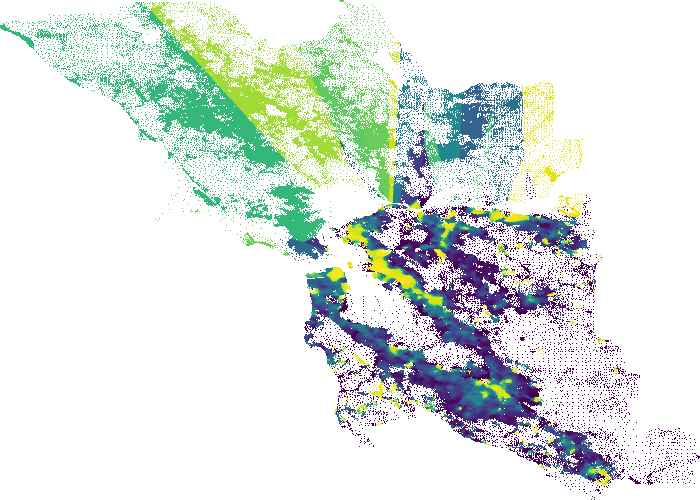

In [19]:
variable_name = 'prop_poor_1500_walk'
#parcels[variable_name] = misc.reindex(nodeswalk, parcels.node_id_walk)

cvs = ds.Canvas(plot_width=700, plot_height=500)
agg = cvs.points(parcelmerge, 'x', 'y', ds.mean(variable_name))
img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
img

In [6]:
orca.run(['initialize_network_beam'])

Running step 'initialize_network_beam'
Time to execute step 'initialize_network_beam': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s


## Existing Bay Area network-based accessibility variables

In [13]:
num_pandana_vars = len([col for col in orca.get_table('parcels').columns if ('_flat' in col) or ('_linear' in col)])
print('There are %s currently defined variables utilizing pandana' % num_pandana_vars)

There are 0 currently defined variables utilizing pandana


In [9]:
visualize_parcel_variable('total_jobs_sum_800_flat')

NameError: name 'visualize_parcel_variable' is not defined

## Exploring network query parameters

In [5]:
hh_numeric_cols = ['persons', 'income', 'tenure', 'cars', 'race_of_head', 'age_of_head','workers', 'children', 'recent_mover']
parcels = orca.get_table('parcels').local
orca.run(['initialize_network_walk'])

network = netwalk

households = orca.get_table('households').to_frame(['persons', 'income', 'tenure', 'cars', 'race_of_head',
                                                    'age_of_head','workers', 'children', 'recent_mover', 'node_id'])

Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s


NameError: name 'netbeam' is not defined

In [5]:

interact(hh_network_access_plot, table_var_name=hh_numeric_cols, distance=FloatSlider(min=200, max=5000, step=100, continuous_update=False), agg_function=['sum', 'ave', 'std'], decay=['flat', 'linear'])

interactive(children=(Dropdown(description='table_var_name', options=('persons', 'income', 'tenure', 'cars', '…

<function __main__.hh_network_access_plot(table_var_name, distance, agg_function, decay)>

## Step by Step Calculation with Walk Network

### This process works for the walk network but not for the small network due to some dtype mismatch error

In [17]:
# Read model data
parcels = orca.get_table('parcels').local
buildings = orca.get_table('buildings').local
parcels['total_du'] = buildings.groupby('parcel_id').residential_units.sum()
parcels.total_du = parcels.total_du.fillna(0)

# Read network edges and nodes
edges = orca.get_table('edgeswalk').local
nodes = orca.get_table('nodeswalk').local

In [18]:
print(nodes.head())
print(edges.head())
print(parcels[['x', 'y']].head())
print(nodes.dtypes)
print(edges.dtypes)

                   x          y  ref          highway
osmid                                                
25457938 -121.553913  37.007868  NaN  traffic_signals
25457939 -121.550781  37.002077  NaN              NaN
26027651 -122.102672  37.418131  NaN              NaN
26027655 -122.109872  37.407176  NaN              NaN
26027656 -122.113605  37.401376  NaN  traffic_signals
   uniqueid           u           v  key  oneway      highway  \
0         0  5125439488  5436098947    0   False      footway   
1         1  5125439488  5436093519    0   False      footway   
2         2  5125439488  5436098941    0   False      footway   
3         3  1919942662  1919942666    0   False  residential   
4         4  1919942662  1919942666    1   False  residential   

                  name   length lanes width  est_width maxspeed access  \
0                  NaN    5.205   NaN   NaN        NaN      NaN    NaN   
1                  NaN    5.379   NaN   NaN        NaN      NaN    NaN   
2        

### Initialize the network

In [19]:
# Walk Network
net = pdna.Network(nodes["x"], nodes["y"], edges["u"], edges["v"],
                       edges[["length"]])
net.precompute(5000)

/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:82: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  nodes_df.astype('double').as_matrix(),
/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  edges.as_matrix(),
/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:85: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  .astype('double')
/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:91: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.kdtree = KDTree(nodes_df.as_matrix())


### Attach node ids

In [8]:
parcels['node_id_walk'] = net.get_node_ids(parcels['x'], parcels['y'])

/anaconda3/envs/urbansim/lib/python3.6/site-packages/pandana/network.py:371: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  distances, indexes = self.kdtree.query(xys.as_matrix())


In [9]:
parcels[['x', 'y', 'node_id_walk']].head()

,x,y,node_id_walk
parcel_id,,,
229116,-121.795620,37.655379,53091636
244166,-121.713004,37.717277,53059159
202378,-122.014199,37.655260,1852532916
2004420,-122.771868,38.727893,304716887
340332,-121.974508,37.546277,2397935818


### Set a variable on the network

In [10]:
net.set(parcels.node_id_walk, variable = parcels.total_du)
print('ok')

ok


### Run query

In [11]:
%time
results = net.aggregate(1000, type='sum', decay='linear')
print('ok')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
ok


### Visualize results

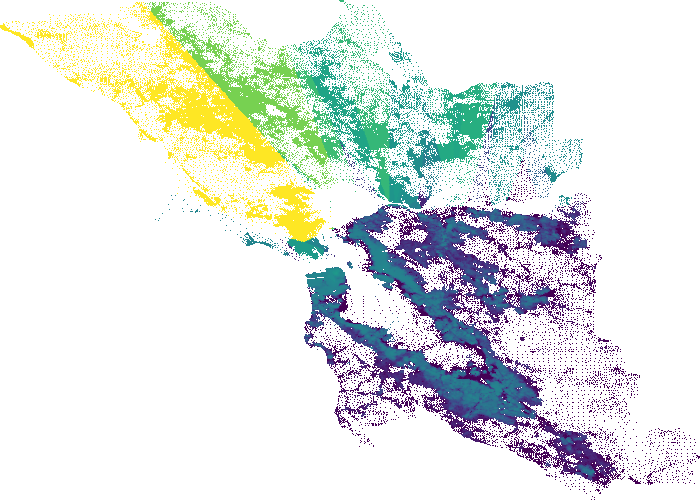

In [12]:
variable_name = 'du_5km'
parcels[variable_name] = misc.reindex(results, parcels.node_id_walk)

cvs = ds.Canvas(plot_width=700, plot_height=500)
agg = cvs.points(parcels, 'x', 'y', ds.mean(variable_name))
img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
img

## Step by Step Calculation with BEAM Network

### This process dies at the run query step below

In [13]:
# Read model data
parcels = orca.get_table('parcels').local
buildings = orca.get_table('buildings').local
parcels['total_du'] = buildings.groupby('parcel_id').residential_units.sum()
parcels.total_du = parcels.total_du.fillna(0)

# Read network edges and nodes
#edges = orca.get_table('edgesbeam').local
#nodes = orca.get_table('nodesbeam').local

### Initialize the network

In [14]:
# BEAM Network
#net = pdna.Network(nodes["lon"], nodes["lat"], edges["from"], edges["to"],
#                       edges[["traveltime"]])
#net.precompute(1000)

### Attach node ids

In [15]:
parcels['node_id_beam'] = netbeam.get_node_ids(parcels['x'], parcels['y'])

AttributeError: 'NoneType' object has no attribute 'get_node_ids'

In [14]:
parcels[['x', 'y', 'node_id_beam']].head()

,x,y,node_id_beam
parcel_id,,,
229116,-121.795620,37.655379,32326
244166,-121.713004,37.717277,28383
202378,-122.014199,37.655260,28377
2004420,-122.771868,38.727893,36005
340332,-121.974508,37.546277,64514


### Set a variable on the network

In [17]:
netbeam.set(parcels.node_id_beam, variable = parcels.total_du)
print('ok')

ok


### Run query

### Something happens in the cell below that kills the kernel

In [18]:
%time
results = netbeam.aggregate(1000, type='sum', decay='linear')
print('ok')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
ok


In [19]:
2+2

4

### Visualize results

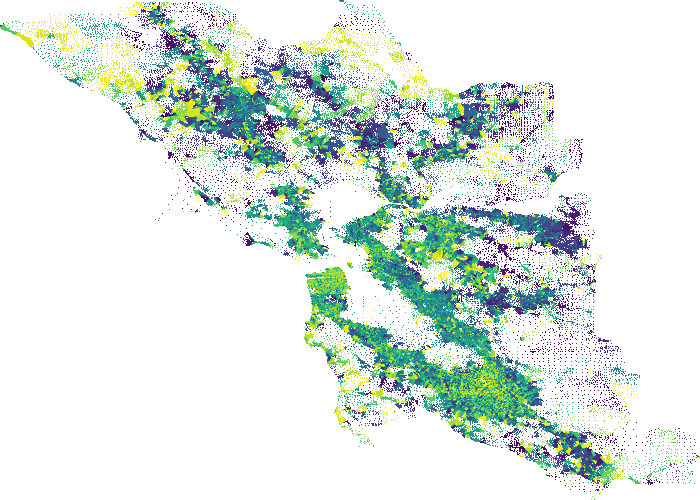

In [20]:
variable_name = 'du_5km'
parcels[variable_name] = misc.reindex(results, parcels.node_id_beam)

cvs = ds.Canvas(plot_width=700, plot_height=500)
agg = cvs.points(parcels, 'x', 'y', ds.mean(variable_name))
img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
img